# Машинное обучение (ДВФУ)

## Домашнее задание 3 (10 баллов)

### Дедлайн: 27 марта, 23:59

Домашнее задание состоит из двух частей и бонусного задания. Каждая часть оценивается в 5 баллов, а все задания внутри одной части имеют одинаковый вес. За бонусное задание можно получить до трёх баллов, которые будут просуммированны с баллами за основное задание (то есть максимально за домашнее задание можно получить 13 баллов; баллы выше 10 так и пойдут в формулы оценок). 

### Про задание

1. Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`.

2. Гуглите как можно больше! Если у вас появляется какой-то вопрос про использование метода numpy, скорее всего, на него уже есть ответ в Google – главное, правильно задать вопрос! Использование поисковика резко поощряется. 

3. Плагиат не допускается (нельзя просто так списать у друга). **НО:** можно использовать **любую** информацию из открытых Интернет-источников с указанием ссылки на них. Правила оформления из ДЗ 1 сохраняются.

4. Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

---

## Часть 1: Линейная регрессия (5 баллов)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

В этой части мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

**Задание 0:** Зарегистрируйтесь на kaggle и скачайте файл с данными `diamonds.csv`. Создайте в папке, в которой находится эта тетрадка, папку `data` и переместите скачанный файл в неё. Если всё сделано правильно, то код ниже прочтёт и сохранит в переменную `data` датафрейм с данными.

In [2]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задание 1:** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [3]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**Задание 2:** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [4]:
data.drop('Unnamed: 0', axis=1, inplace=True)

**Задание 3:** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [5]:
import seaborn as sns
numeric_data = data.select_dtypes(include=np.number)

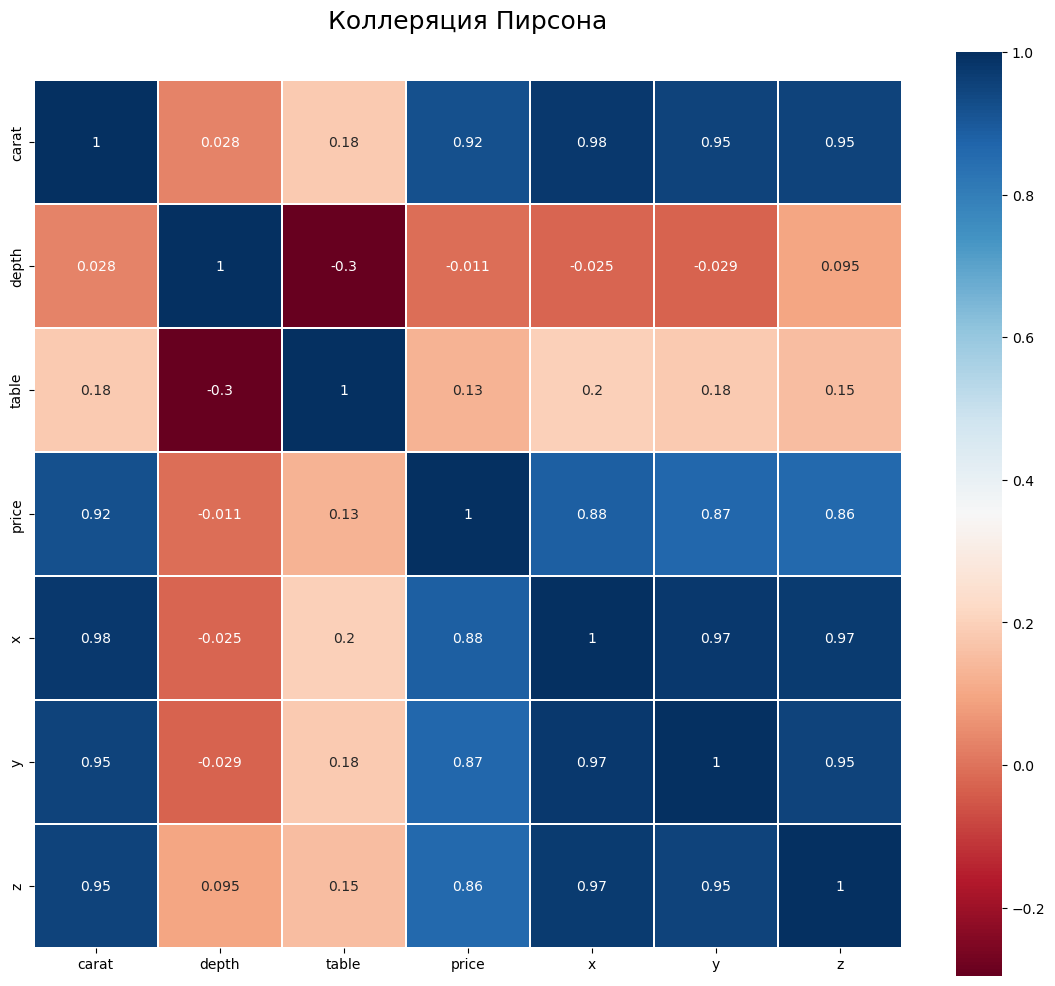

In [6]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Коллеряция Пирсона', y=1.05, size=18)
sns.heatmap(numeric_data.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

**Задание 4:** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [68]:
data = pd.get_dummies(data, drop_first=True, columns=['cut', 'color', 'clarity'])
data

KeyError: "None of [Index(['cut', 'color', 'clarity'], dtype='object')] are in the [columns]"

**Задание 5:** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [8]:
from sklearn.model_selection import train_test_split


X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

**Задание 6:** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [9]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
X_train_sc.shape, X_test_sc.shape

((37758, 23), (16182, 23))

**Задание 7:** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


model = LinearRegression()
model.fit(X_train_sc, y_train)
y_train_pred = model.predict(X_train_sc)
y_test_pred = model.predict(X_test_sc)
print(f"MSE на тренировочной выборке - {mean_squared_error(y_train, y_train_pred):0.0f}")
print(f"MSE на тестовой выборке - {mean_squared_error(y_test, y_test_pred):0.0f}")

MSE на тренировочной выборке - 1270792
MSE на тестовой выборке - 1291194


**Задание 8:** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [11]:
def print_coefs(columns, model):
    coefs = [(col, coef)for col, coef in zip(columns, model.coef_)]
    coefs.sort(key=lambda x: abs(x[1]), reverse=True)
    for col, coef in coefs:
        print(f"{col:<15} {coef:0.2f}")
print_coefs(X_train.columns, model)

carat           5307.72
clarity_VS2     1814.47
clarity_VS1     1659.36
clarity_SI1     1592.53
clarity_VVS2    1456.15
clarity_VVS1    1280.20
x               -1089.76
clarity_SI2     1038.76
clarity_IF      959.22
color_J         -525.76
color_I         -452.13
cut_Ideal       420.77
color_H         -353.41
cut_Premium     344.49
cut_Very Good   311.98
color_G         -204.57
cut_Good        177.31
color_F         -105.98
depth           -90.91
color_E         -87.94
table           -63.02
z               -40.20
y               0.35


**Задание 9:** Как можно заметить из анализа корреляционной матрицы в задании 3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы мультиколлинеарности. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [12]:
from sklearn.linear_model import Lasso, Ridge


lasso = Lasso(alpha=10, random_state=123)
ridge = Ridge(alpha=10, random_state=123)
lasso.fit(X_train_sc, y_train)
ridge.fit(X_train_sc, y_train)
print("Коэффициенты лассо регрессии:")
print_coefs(X_train.columns, lasso)
print("Коэффициенты ридж регрессии:")
print_coefs(X_train.columns, ridge)

Коэффициенты лассо регрессии:
carat           4825.59
clarity_VS2     1096.74
clarity_VS1     1038.78
clarity_VVS2    955.79
clarity_SI1     859.34
clarity_VVS1    845.66
x               -659.98
clarity_IF      645.58
color_J         -465.59
clarity_SI2     402.43
color_I         -379.28
color_H         -280.71
cut_Ideal       207.42
cut_Premium     152.77
cut_Very Good   136.24
color_G         -126.93
depth           -100.05
table           -73.61
cut_Good        48.47
color_F         -39.29
z               -33.75
color_E         -17.84
y               -0.00
Коэффициенты ридж регрессии:
carat           5270.62
clarity_VS2     1784.95
clarity_VS1     1634.03
clarity_SI1     1562.22
clarity_VVS2    1435.89
clarity_VVS1    1262.83
x               -1049.46
clarity_SI2     1012.94
clarity_IF      946.85
color_J         -524.43
color_I         -450.78
cut_Ideal       421.41
color_H         -352.51
cut_Premium     345.14
cut_Very Good   312.91
color_G         -203.97
cut_Good        177.61
c

**Задание 10:** Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [51]:
lasso_norms = []
ridge_norms = []
for alpha in (0.1, 1, 10, 100, 200):
    lasso_model = Lasso(alpha=alpha, random_state=123).fit(X_train_sc, y_train)
    ridge_model = Ridge(alpha=alpha, random_state=123).fit(X_train_sc, y_train)
    lasso_norms.append(np.linalg.norm(lasso_model.coef_))
    ridge_norms.append(np.linalg.norm(ridge.coef_))
df = pd.DataFrame(data=[lasso_norms, ridge_norms], columns=(0.1, 1, 10, 100, 200), index=('lasso', 'ridge')).T
df

,lasso,ridge
0.1,6679.835836,6622.653915
1.0,6557.097412,6622.653915
10.0,5432.395364,6622.653915
100.0,3865.735306,6622.653915
200.0,3578.399279,6622.653915


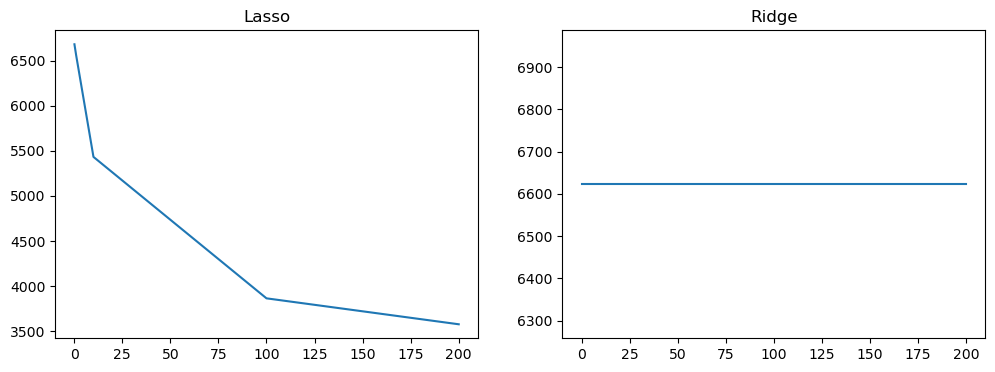

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # rows == 1, columns == 3
axes[0].plot(df.index, df['lasso'])
axes[1].plot(df.index, df['ridge'])
axes[0].set_title('Lasso')
axes[1].set_title('Ridge')
plt.show()

**Задание 11:** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [62]:
from sklearn.linear_model import LassoCV
lassoCV = LassoCV(alphas=[0.1, 1, 10, 100, 200], cv=5)
lassoCV.fit(X_train_sc, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2615960190.1722336, tolerance: 47919147.97014151
  model = cd_fast.enet_coordinate_descent_gram(


LassoCV(alphas=[0.1, 1, 10, 100, 200], cv=5)

In [67]:
pd.DataFrame(lassoCV.mse_path_.mean(1), lassoCV.alphas_, columns=['MSE'])

,MSE
200.0,2.155990e+06
100.0,1.785211e+06
10.0,1.334838e+06
1.0,1.276161e+06
0.1,1.287017e+06


In [70]:
1.276161e+06 ** 0.5

1129.6729615247061

## Часть 2: Линейная классификация (5 баллов)

Для наших экспериентов возьмём обучающую выборку [отсюда](https://www.kaggle.com/iabhishekofficial/mobile-price-classification).

**Задание $12-\varepsilon$:** повторите шаги из задания 0 для новых данных `train.csv`.

In [90]:
train = pd.read_csv('data/train.csv')
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Решается задача многоклассовой классификации — определение ценовой категории телефона. Для простоты перейдём к задаче бинарной классификации — пусть исходные классы 0 и 1 соответствуют классу 0 новой целевой переменной, а остальные классу 1.

**Задание 12:** Замените целевую переменную, отделите её в отдельную переменную и удалите из исходной выборки.

In [91]:
train.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [92]:
train.loc[train.price_range == 1, 'price_range'] = 0
train.loc[train.price_range != 0, 'price_range'] = 1
train.price_range.value_counts()

0    1000
1    1000
Name: price_range, dtype: int64

In [93]:
y = train['price_range']
X = train.drop('price_range', axis=1)

**Задание 13:** Разделите выборку на обучающую и тестовую части, долю тестовой части укажите равной 0.3.

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

В этой части вы будете обучать самый простой бинарный классификатор — логистическую регрессию. Будем использовать готовую реализацию `LogisticRegression` из scikit-learn.

Логистическая регрессия — линейный метод, то есть в нём предсказание алгоритма вычислаяется как скалярное произведение признаков и весов алгоритма: 

$$
b(x) = w_0 + \langle w, x \rangle = w_0 + \sum_{i=1}^{d} w_i x_i
$$

Для вычисления вероятности положительного класса применяется сигмоида. В результате предсказание вероятности принадлежности объекта к положительному классу можно записать как: 

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- w_0 - \langle w, x \rangle )}
$$

Не забывайте, что для линейных методов матрицу объекты-признаки рекомендуется предварительно масштабировать (то есть привести каждый признак к одному и тому же масштабу одним из способов). Для этого можно воспользоваться `StandardScaler` или сделать это вручную.

**Задание 14:** Отмасштабируйте признаки.

In [96]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
X_train_sc.shape, X_test_sc.shape

((1400, 20), (600, 20))

**Задание 15:** Обучите логистическую регрессию. Сделайте предсказания для тестовой части, посчитайте по ним AUC ROC и Accuracy (порог 0.5). Хорошо ли удаётся предсказывать целевую переменную?

Не забывайте, что метод `predict_proba` вычисляет вероятности обоих классов выборки, а в бинарной классификации нас интересует в первую очередь вероятность принадлежности к положительному классу.

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve


lr = LogisticRegression(C=2)
lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)[:, 1]
print(f"ROC AUC - {roc_auc_score(y_test, y_pred)}")
print(f"Accuracy - {accuracy_score(y_test, lr.predict(X_test))}")

ROC AUC - 0.9654762433885951
Accuracy - 0.8916666666666667


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Задание 16:** Постройте для обученной логистической регрессии ROC-кривую `roc_curve` и PR-кривую `precision_recall_curve`. Что можно сказать о качестве классификации в целом? Какой порог классификации оптимален?

In [112]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

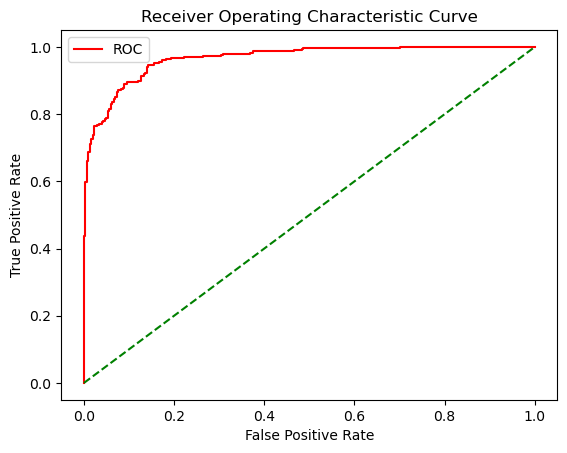

In [114]:
from sklearn.metrics import roc_curve


fper, tper, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fper, tper)

In [119]:
from sklearn.metrics import precision_recall_curve


def plot_precision_recall_curve(pr, re):
    plt.plot(pr, re, color='red', label='PRC')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend()
    plt.show()

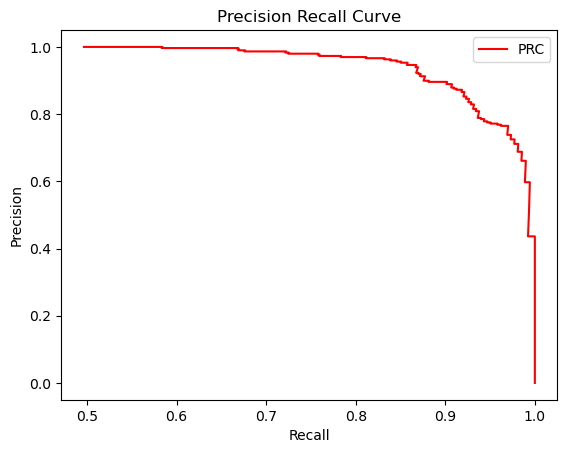

In [120]:
pr, re, thresholds = precision_recall_curve(y_test, y_pred)
plot_precision_recall_curve(pr, re)

## Бонусное задание: Обучение логистической регрессии (3 балла)

Если выше вручную мы только применяли логистическую регрессию, то здесь предлагается реализовать обучение с помощью полного градиентного спуска.

Если кратко, то обучение логистической регрессии с $L_2$-регуляризацией можно записать следующим образом:

$$
Q(w, X) = \frac{1}{l} \sum_{i=1}^{l} \log (1 + \exp(- y_i \langle w, x_i \rangle )) + \frac{\lambda_2}{2} \lVert w \rVert _2^2 \to \min_w
$$

Считаем, что $y_i \in \{-1, +1\}$, а нулевым признаком сделан единичный (то есть $w_0$ соответствует свободному члену). Искать $w$ будем с помощью градиентного спуска:

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla_w Q(w, X)
$$

В случае полного градиентного спуска $\nabla_w Q(w, X)$ считается напрямую (как есть, то есть, используя все объекты выборки). Длину шага $\alpha > 0$ в рамках данного задания предлагается брать равной некоторой малой константе.

Градиент по объекту $x_i$ считается по следующей формуле:

$$
\nabla_w Q(w, x_i) = - \frac{y_i x_i}{1 + \exp(y_i \langle w, x_i \rangle)} + \lambda_2 w
$$

На самом деле неправильно регуляризировать свободный член $w_0$ (то есть при добавлении градиента для $w_0$ не надо учитывать слагаемое с $\lambda_2$). Но в рамках этого задания мы не обращаем на это внимания и работаем со всеми вектором весов одинаково. 

В качестве критерия останова необходимо использовать (одновременно):
- проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$) — параметр tolerance
- достижение максимального числа итераций (например, 10000) — параметр max\_iter.

Инициализировать веса можно случайным образом или нулевым вектором. 

Выполните **ровно один** из вариантов ниже (какой - без разницы, на баллы не влияет). 

### Вариант 1: брутальный

Реализуйте обучение логистической регрессии. Для удобства ниже предоставлен прототип с необходимыми методами. В `loss_history` необходимо сохранять вычисленное на каждой итерации значение функции потерь.

In [ ]:
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, lambda_2=1.0, tolerance=1e-4, max_iter=1000, alpha=1e-3):
        """
        lambda_2: L2 regularization param
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        alpha: learning rate
        """
        self.lambda_2 = lambda_2
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.alpha = alpha
        self.w = None
        self.loss_history = None
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []
        
        pass
        
        return self
    
    def predict_proba(self, X):
        """
        X: np.array of shape (l, d)
        ---
        output: np.array of shape (l, 2) where
        first column has probabilities of -1
        second column has probabilities of +1
        """
        if self.w is None:
            raise Exception('Not trained yet')
        
        pass
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        pass

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        pass

1. Примените логистическую регресиию на той же выборке.
2. Посчитайте качество по тем же метрикам.
3. Визуализируйте изменение значений функции потерь от номера итераций.

**Подсказка 1:** [видео](https://www.youtube.com/watch?v=Cx94tHmOuoA) и [статья с основами](https://python-scripts.com/object-oriented-programming-in-python) ООП.

**Подсказка 2:** как и в предыдущем домашнем заднии, все функции внутри класса можно воспринимать как обычные функции, добавляется только взаимодействие между ними. Переменные и функции, заданные внутри класса, можно вызывать из любого места внутри класса, используя `self.`! Например:

In [5]:
class ExampleClass:
    
    def __init__(self):
        self.x = 1 # Переменная x, созданная при инициализации класса
        
    def some_func(self):
        print(self.x) # Обращаемся к x из другого места класса
        
    def other_func(self):
        self.some_func() # Вызываем другую функцию этого класса

**Подсказка 3:** реализованный класс имеет ту же структуру методов, что и классы в sklearn, то есть пайплайн работы с ним такой:

In [ ]:
logreg = LogReg()
logreg.fit(..., ...)
logreg.predict(..., ...)

### Вариант 2: менее брутальный

Реализуйте алгоритм выше в виде отдельных функций. Задания те же.

1. Примените логистическую регресиию на той же выборке.
2. Посчитайте качество по тем же метрикам.
3. Визуализируйте изменение значений функции потерь от номера итераций.

In [8]:
def fit(X, y, lambda_2=1.0, tolerance=1e-4, max_iter=1000, alpha=1e-3):
    """
    X: np.array of shape (l, d)
    y: np.array of shape (l)
    lambda_2: L2 regularization param
    tolerance: for stopping gradient descent
    max_iter: maximum number of steps in gradient descent
    alpha: learning rate
    ---
    output: w
    """
    # code...
    
    w = ...

    return w

In [10]:
def predict_proba(X, w):
    pass

In [ ]:
def ... # другие функции